# Data Visualization for the Car details dataset

## Importing the standard libraries and the dataset

In [31]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
dataset = pd.read_csv('./assets/car-details-for-visualization.csv')
dataset_unaltered = pd.read_csv('./assets/car-details.csv')

dataset.head()

,brand,year,km_driven,fuel,transmission,seller_type,owner,seats,mileage,engine,max_power,nm,selling_price
0,Maruti,2014,145500,1,0,1,0,5.0,23.40,1248,74.00,190.00,450000
1,Skoda,2014,120000,1,0,1,2,5.0,21.14,1498,103.52,250.00,370000
2,Honda,2006,140000,3,0,1,4,5.0,17.70,1497,78.00,124.54,158000
3,Hyundai,2010,127000,1,0,1,0,5.0,23.00,1396,90.00,219.67,225000
4,Maruti,2007,120000,3,0,1,0,5.0,16.10,1298,88.20,112.78,130000


Confirming the dataset is available and correct:

In [33]:
dataset.head()

,brand,year,km_driven,fuel,transmission,seller_type,owner,seats,mileage,engine,max_power,nm,selling_price
0,Maruti,2014,145500,1,0,1,0,5.0,23.40,1248,74.00,190.00,450000
1,Skoda,2014,120000,1,0,1,2,5.0,21.14,1498,103.52,250.00,370000
2,Honda,2006,140000,3,0,1,4,5.0,17.70,1497,78.00,124.54,158000
3,Hyundai,2010,127000,1,0,1,0,5.0,23.00,1396,90.00,219.67,225000
4,Maruti,2007,120000,3,0,1,0,5.0,16.10,1298,88.20,112.78,130000


### Visualizing the correlation between features

In [34]:
price_mean = dataset['selling_price'].mean()
price_median = dataset['selling_price'].median()

print('Mean:', price_mean)
print('Median:', price_median)

Mean: 577569.3515946502
Median: 450000.0


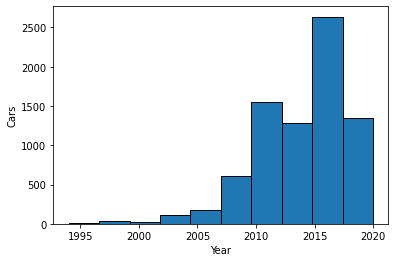

In [35]:
plt.hist(dataset["year"], edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Cars")
plt.show()

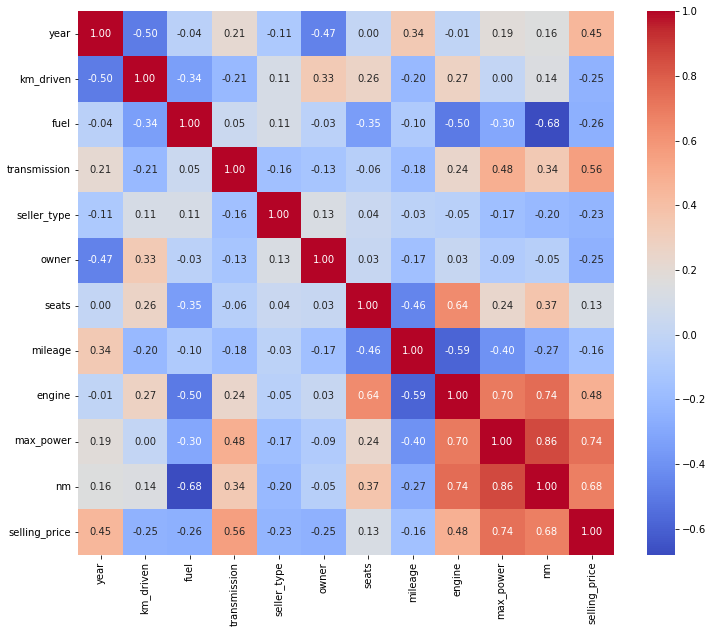

In [36]:
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(), annot=True, fmt='.2f', cbar=True, cmap='coolwarm')
plt.show()

Seeing this plot helps visualize the relationship between the selling price and other features.

Not having done this, I would have believed a feature like km_driven and mileage would be a lot more correlated with the selling price.

The features that seem important for the selling price is year, transmission, engine, max_power and nm.

Looking at the big picture that also makes sense, because cars that produce more power are usually more expensive. However, the other features are not to be counted out yet.

## Visualization in relation of sales price

Most cars seem to be of newer sort

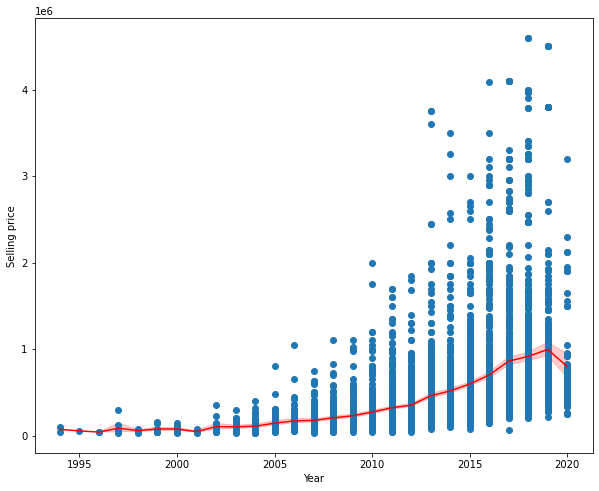

In [37]:
plt.figure(figsize=(10, 8))
plt.ylabel("Selling price")
plt.xlabel("Year")
sns.lineplot(x="year", y="selling_price", data=dataset, color='red')
plt.scatter(dataset['year'], dataset['selling_price'])
plt.show()


There seems to be a linear growth in the selling price the newer the car is, as expected up until 2019. For some reason it drops in 2020. (Could be pandemic related)

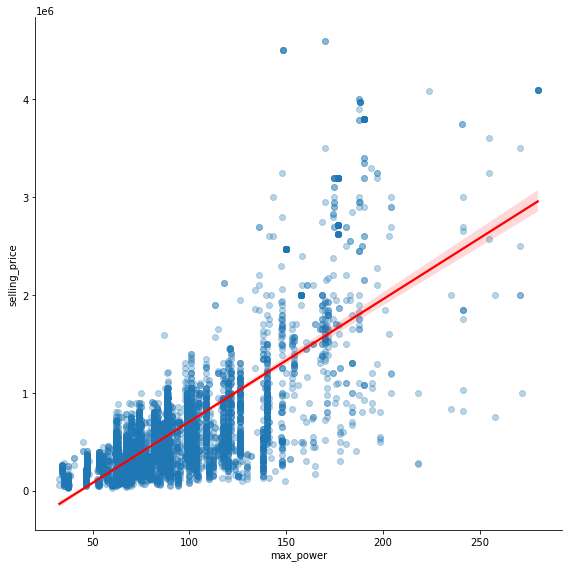

In [38]:
sns.lmplot(x="max_power", y="selling_price", data=dataset, scatter_kws={"alpha" : 0.3}, line_kws={"color" : "red"}, height=8)
plt.show()


The HP to selling price ratio also seems to be a linear relationship.

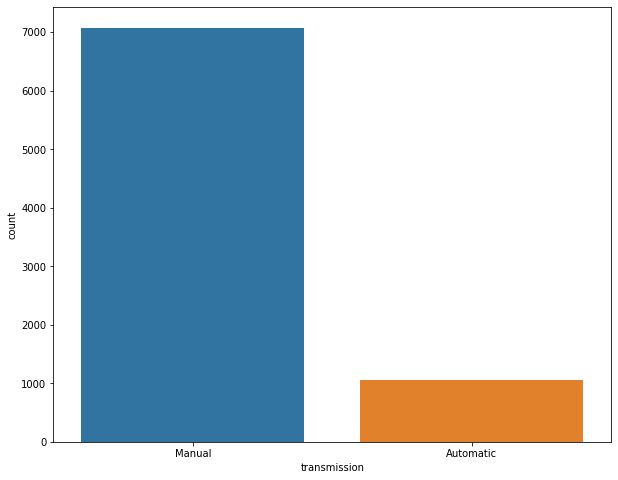

In [39]:
plt.figure(figsize=(10, 8))
sns.countplot(x="transmission", data=dataset_unaltered)
plt.show()

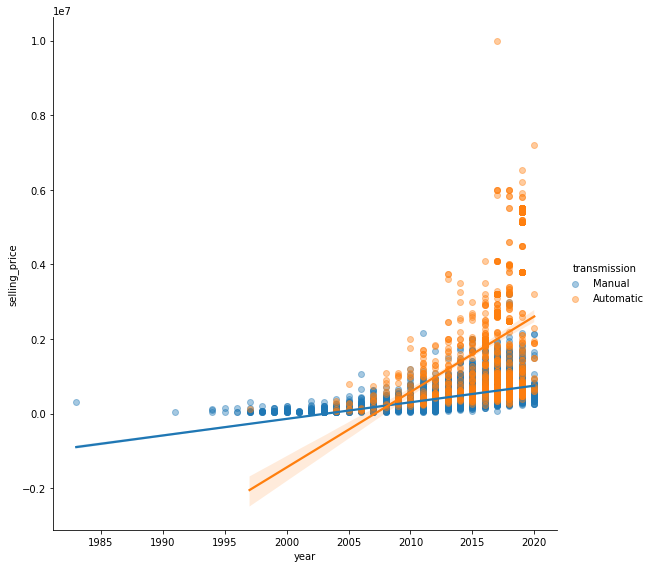

In [40]:
sns.lmplot(x="year", y="selling_price", data=dataset_unaltered, hue="transmission", scatter_kws={"alpha" : 0.4}, height=8)
plt.show()

Automatic transmissions seem to be affect the sales price more than manual transmissions

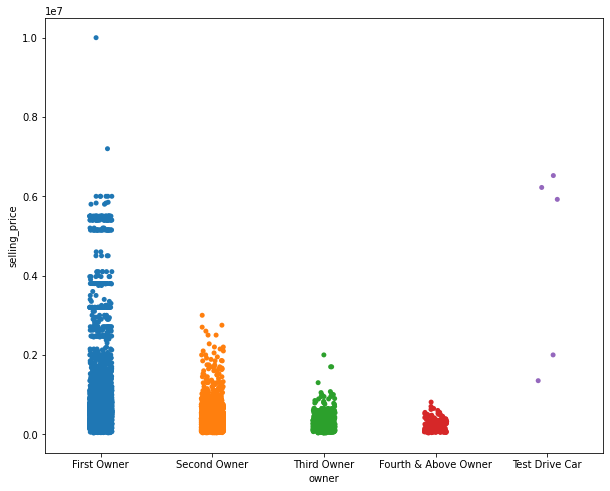

In [41]:
plt.figure(figsize=(10, 8))
sns.stripplot(y="selling_price", x="owner", data=dataset_unaltered)
plt.show()

Cars that only have had 1 owner (0) seem to be the most expensive. As soon as they are on to the 2nd owner they drastically drop in price. Test drive cars (3) seem to hold up their value.

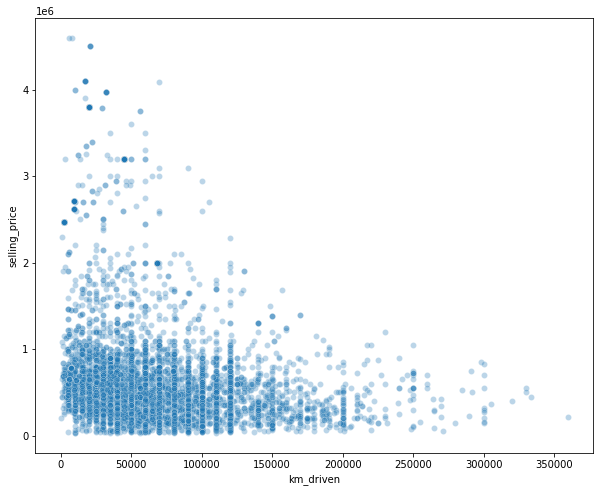

In [42]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="km_driven", y="selling_price", data=dataset, alpha=0.3)
plt.show()

Cars that have driven less are the most expensive as expected.

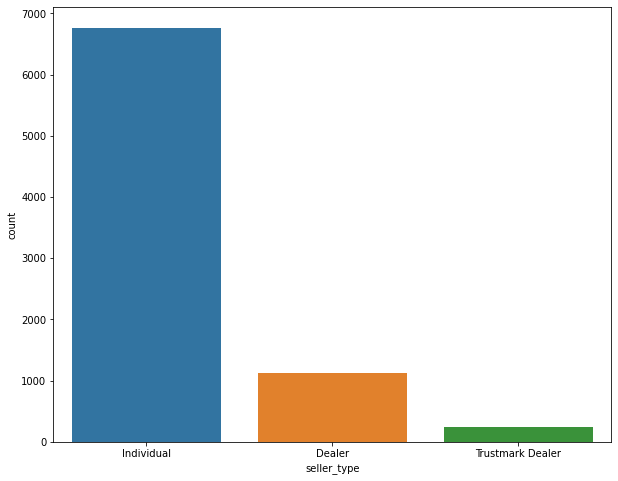

In [43]:
plt.figure(figsize=(10, 8))
sns.countplot(x="seller_type", data=dataset_unaltered)
plt.show()

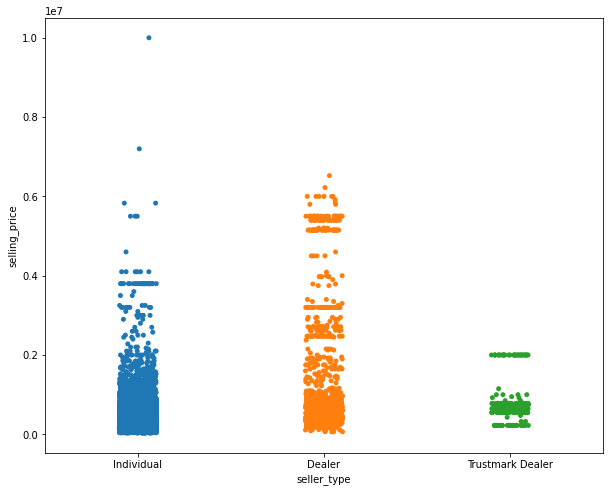

In [44]:
plt.figure(figsize=(10, 8))
sns.stripplot(y="selling_price", x="seller_type", data=dataset_unaltered)
plt.show()

A lot of private sales in this dataset. However dealers seem to have more expensive sales. 

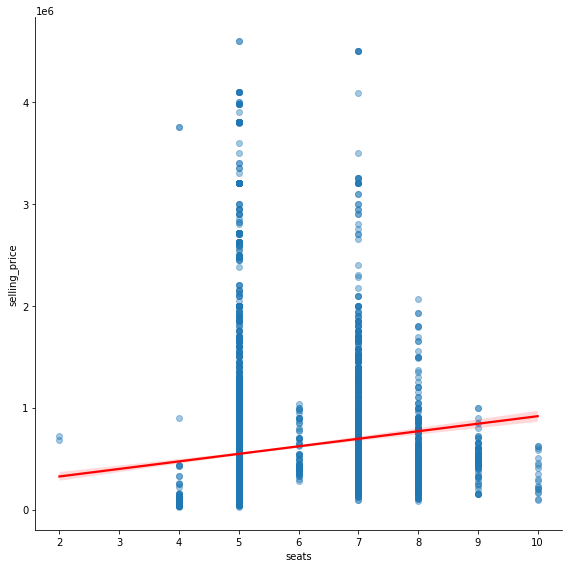

In [45]:
sns.lmplot(x="seats", y="selling_price", data=dataset, scatter_kws={"alpha" : 0.4}, height=8, line_kws={"color" : "red"})

The amount of seats in a car seems to have a small linear relationship with the selling price.

## Visualization in relation of fuel types